In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("goodreads_books.csv", on_bad_lines="skip")
df.shape

(11123, 12)

In [5]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='str')

In [28]:
df.columns= df.columns.str.strip()

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  str    
 2   authors             11123 non-null  str    
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  str    
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  str    
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  str    
 11  publisher           11123 non-null  str    
dtypes: float64(1), int64(5), str(6)
memory usage: 1.0 MB


In [7]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [8]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

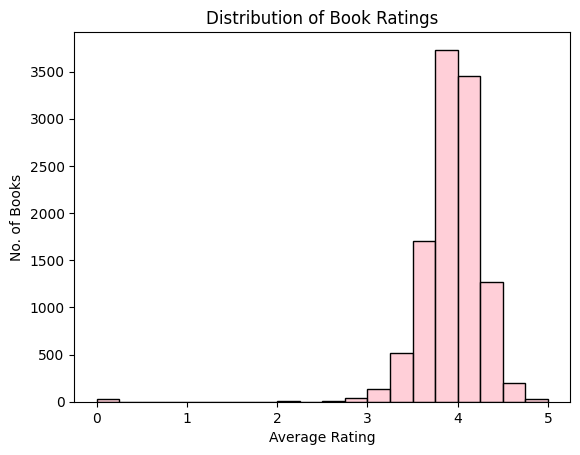

In [10]:
sns.histplot(df["average_rating"], bins=20, color="pink")
plt.title("Distribution of Book Ratings")
plt.xlabel("Average Rating")
plt.ylabel("No. of Books")
plt.show()

Most books are rated between 3.5 and 4.5, indicating generally positive reader feedback.

In [23]:
df.sort_values(by="ratings_count",ascending=False)[
    ["title","authors","average_rating","ratings_count"]
].head(10)

,title,authors,average_rating,ratings_count
10336,Twilight (Twilight #1),Stephenie Meyer,3.59,4597666
1697,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,2530894
1462,The Catcher in the Rye,J.D. Salinger,3.80,2457092
307,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,2418736
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,2339585
4415,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,2293963
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,2153167
23,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,2128944
2114,Animal Farm,George Orwell/Boris Grabnar/Peter Škerl,3.93,2111750
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,2095690


Sorted all books by number of ratings (highest to lowest), selected relevant columns, and display the top 10 most popular books.

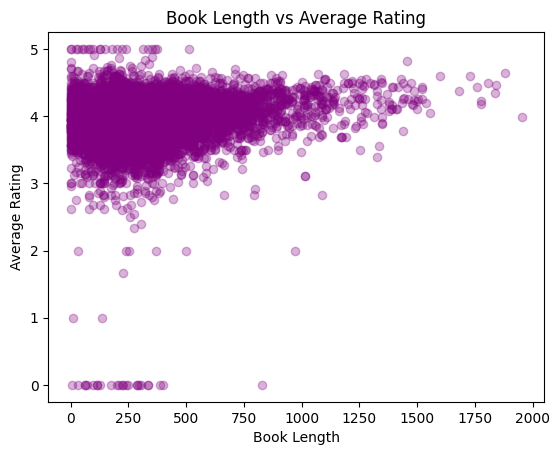

In [40]:
fil_df=df[df["num_pages"]<=2000]

plt.scatter(fil_df["num_pages"], fil_df["average_rating"],alpha=0.3, color="purple")
plt.xlabel("Book Length")
plt.ylabel("Average Rating")
plt.title("Book Length vs Average Rating")
plt.show()

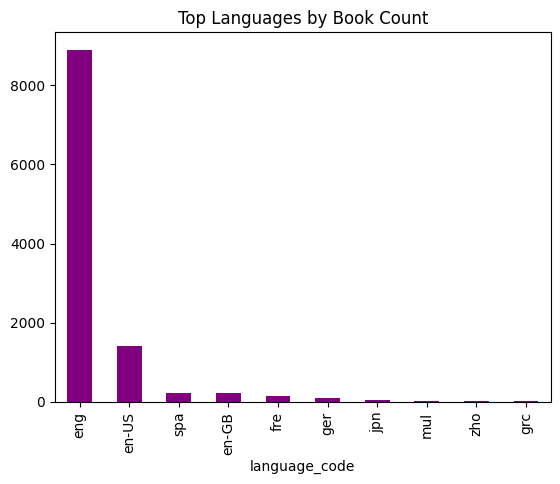

In [45]:
df["language_code"].value_counts().head(10).plot(kind="bar", color="purple")
plt.title("Top Languages by Book Count")
plt.show()